# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [1]:
!pip install scikit-learn --upgrade

  Found existing installation: scikit-learn 0.20.0
    Uninstalling scikit-learn-0.20.0:
      Successfully uninstalled scikit-learn-0.20.0


In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

O desafio é predizer perfis de alunos baseado em diversas variáveis 

<hr>

## Download dos conjuntos de dados em formato .csv

In [1]:
import pandas as pd

In [398]:
df_training_dataset = pd.read_csv('training_dataset.csv')
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13945 non-null  float64
 1   graduacao                   13950 non-null  object 
 2   universidade                13920 non-null  object 
 3   profissao                   13977 non-null  object 
 4   organizacao                 13961 non-null  object 
 5   pretende_fazer_cursos_lit   13989 non-null  float64
 6   interesse_mba_lit           14003 non-null  float64
 7   importante_ter_certificado  13918 non-null  float64
 8   horas_semanais_estudo       13959 non-null  float64
 9   como_conheceu_lit           13915 non-null  object 
 10  total_modulos               13987 non-null  float64
 11  modulos_iniciados           14044 non-null  float64
 12  modulos_finalizados         13924 non-null  float64
 13  certificados                139

Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários da plataforma:

**id**

**graduacao**

**universidade**

**profissao**

**organizacao**

**pretende_fazer_cursos_lit**

**interesse_mba_lit**

**importante_ter_certificado**

**horas_semanais_estudo**

**como_conheceu_lit**

**total_modulos**

**modulos_iniciados**

**modulos_finalizados**

**certificados**

**categoria**

In [399]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13945 non-null  float64
 1   graduacao                   13950 non-null  object 
 2   universidade                13920 non-null  object 
 3   profissao                   13977 non-null  object 
 4   organizacao                 13961 non-null  object 
 5   pretende_fazer_cursos_lit   13989 non-null  float64
 6   interesse_mba_lit           14003 non-null  float64
 7   importante_ter_certificado  13918 non-null  float64
 8   horas_semanais_estudo       13959 non-null  float64
 9   como_conheceu_lit           13915 non-null  object 
 10  total_modulos               13987 non-null  float64
 11  modulos_iniciados           14044 non-null  float64
 12  modulos_finalizados         13924 non-null  float64
 13  certificados                139

In [400]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

In [401]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

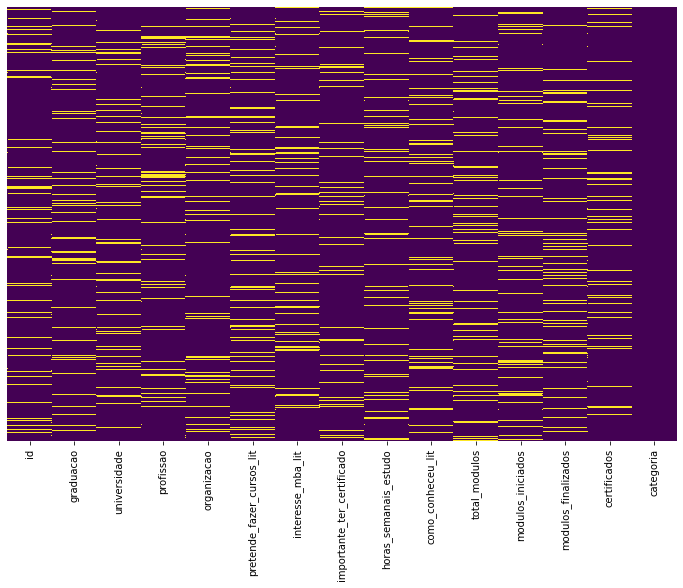

In [402]:
# Visualização de dados nulos por coluna
fig = plt.figure(figsize =(12,8))
sns.heatmap(df_training_dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# Atenção!

A coluna-alvo neste desafio é a coluna ``categoria``

<hr>

## Pre-processando o dataset antes do treinamento

### Removendo todas as linhas que possuem algum valor nulos em determinadas colunas

Usando o método Pandas **DataFrame.dropna()** você pode remover todas as linhas nulas do dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [403]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação DropNA: 

id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64



In [404]:
#dropando valores ausentes
df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['certificados', 'total_modulos','modulos_finalizados'])

In [405]:
# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset após a transformação DropNA: 

id                            1296
graduacao                     1324
universidade                  1286
profissao                     1300
organizacao                   1298
pretende_fazer_cursos_lit     1295
interesse_mba_lit             1281
importante_ter_certificado    1306
horas_semanais_estudo         1306
como_conheceu_lit             1308
total_modulos                    0
modulos_iniciados             1235
modulos_finalizados              0
certificados                     0
categoria                        0
dtype: int64



In [406]:
# Substituindo valores ausentes pelo método fillna()
df_training_dataset['pretende_fazer_cursos_lit'].fillna(0,inplace = True)
df_training_dataset['interesse_mba_lit'].fillna(0,inplace = True)
df_training_dataset['importante_ter_certificado'].fillna(1,inplace = True)
df_training_dataset['horas_semanais_estudo'].fillna(6.016548463356974, inplace = True)

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [407]:
df_training_dataset.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15847,722542433.0,Bacharelado,NaN,Engenheiro,servicos,1.0,1.0,1.0,6.0,Outros,515.0,166.0,102.0,0.0,perfil4
15848,931753956.0,SEM FORMAÇÃO,UFRN,Supervisor,Siderurgica,0.0,0.0,1.0,8.0,Instagram,54.0,37.0,31.0,0.0,perfil2
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,0.0,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [408]:
df__training_dataset = df_training_dataset.drop(columns=['id', 'graduacao', 'universidade', 'organizacao', 'como_conheceu_lit', 'profissao', 'pretende_fazer_cursos_lit','importante_ter_certificado' ], inplace=False)

In [409]:
df_training_dataset_rmcolumns.tail()

,profissao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
9613,Engenheiro,1.0,1.0,1.0,6.0,515.0,166.0,102.0,0.0,perfil4
9614,Supervisor,0.0,0.0,1.0,8.0,54.0,37.0,31.0,0.0,perfil2
9615,Sócio/Dono/Proprietário,0.0,0.0,1.0,7.0,30.0,9.0,8.0,0.0,perfil5
9616,Advogado,0.0,0.0,1.0,10.0,226.0,102.0,93.0,1.0,perfil1
9617,Diretor,1.0,1.0,1.0,9.0,125.0,98.0,97.0,1.0,perfil1


## Treinando um classificador com base no método RandomForest

### Selecionando FEATURES e definindo a variável TARGET

In [426]:
df_training.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados', 'categoria',
       'profissao_Advogado', 'profissao_Analista', 'profissao_Analista Senior',
       'profissao_Assessor', 'profissao_Coordenador', 'profissao_Diretor',
       'profissao_Engenheiro', 'profissao_Gerente', 'profissao_Outros',
       'profissao_SEM EXPERIÊNCIA', 'profissao_Supervisor',
       'profissao_Sócio/Dono/Proprietário'],
      dtype='object')

In [427]:
features = df_training[
    [ 'interesse_mba_lit', 'horas_semanais_estudo', 'total_modulos',
        'modulos_iniciados', 'modulos_finalizados', 'certificados'
    ]
]
target = df_training['categoria']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [428]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

In [435]:
#Balanceando os dados
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train,y_train)

In [436]:
# Treinando o modelo com o RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier(max_depth=15, n_estimators = 500).fit(X_res, y_res)

### Fazendo previsões na amostra de teste

In [437]:
y_pred = dtc.predict(X_test)
print(y_pred)

['perfil2' 'perfil5' 'perfil6' ... 'perfil2' 'perfil1' 'perfil1']


### Analisando a qualidade do modelo através da matriz de confusão

In [438]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

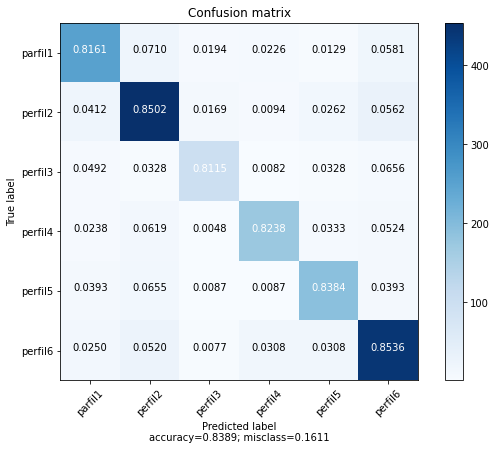

In [417]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

In [418]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

     perfil1       0.82      0.82      0.82       310
     perfil2       0.85      0.85      0.85       534
     perfil3       0.82      0.81      0.81       122
     perfil4       0.85      0.82      0.84       210
     perfil5       0.81      0.84      0.82       229
     perfil6       0.85      0.85      0.85       519

   micro avg       0.84      0.84      0.84      1924
   macro avg       0.83      0.83      0.83      1924
weighted avg       0.84      0.84      0.84      1924

